关于逻辑回归的完整参数，可以参考：https://scikitlearn.com.cn/0.21.3/2/#1111-logistic

## API

参考：https://zhuanlan.zhihu.com/p/39780207



In [18]:
import numpy as np
import pandas as pd
import sklearn

### 模型参数
#### penalty
正则化选择参数，参数可选值为l1和l2，分别对应l1正则化和l2正则化，默认是l2正则化。

调整该参数的目的主要是为了防止过拟合，一般penalty选择l2正则化就够啦，但是如果选择l2正则化发现依然过拟合，即预测效果还是很差的时候，就可以考虑l1正则化。如果模型的特征非常多，我们希望做一些特征选择（即把一些不重要的特征过滤掉），这个时候也可以考虑用l1正则化。

penalty参数的选择会影响我们损失函数优化算法的选择，即参数solver的选择，如果是l2正则化，可选的优化算法 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}都可以选择。但是如果penalty是L1正则化的话，就只能选择‘liblinear’了。这是因为L1正则化的损失函数不是连续可导的，而{‘newton-cg’, ‘lbfgs’,‘sag’}这三种优化算法时都需要损失函数的一阶或者二阶连续导数。而‘liblinear’并没有这个依赖。这几个优化方法在solver参数环节进行讲述。

#### dual
用来指明是否将原问题改成他的对偶问题，对偶问题可以理解成相反问题，比如原问题是求解最大值的线性规划，那么他的对偶问题就是转化为求解最小值的线性规划，适用于样本较小的数据集，因样本小时，计算复杂度较低。

#### tol
残差收敛条件，默认是0.0001，也就是只需要收敛的时候两步只差＜0.0001就停止，可以设置更大或更小。(逻辑回归模型的损失函数是残差平方和)

#### C
正则化系数，正则化强度的导数，必须是一个正数，值越小，正则化强度越大，即防止过拟合的程度更大。

####  fit_intercept
是否将截距/方差加入到决策模型中，默认为True。

#### class_weight
class_weight是很重要的一个参数，是用来调节正负样本比例的，默认是值为None，也就是正负样本的权重是一样的，你可以以dict的形式给模型传入任意你认为合适的权重比，也可以直接指定一个值“balanced”，模型会根据正负样本的绝对数量比来设定模型最后结果的权重比。

比如，有一数据集的正负样本绝对数量比为4:6,如果你给参数class_weight赋予balanced值，那么最后模型结果中，正负样本的权重比就会变成6:4。

#### random_state
随机种子的设置，默认是None,如果设置了随机种子，那么每次使用的训练集和测试集都是一样的，这样不管你运行多少次，最后的准确率都是一样的；如果没有设置，那么每次都是不同的训练集和测试集，最后得出的准确率也是不一样的。

#### solver
用来指明损失函数的优化方法，默认是‘liblinear’方法，sklearn自带了如下几种：

参数值优化方法liblinear使用了坐标轴下降法来迭代优化损失函数lbfgs拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数newton-cg也是牛顿法法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数sag即随机平均梯度下降，是梯度下降法的变种，是一种线性收敛算法，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候

newton-cg, lbfgs和sag这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。而liblinear对L1正则化和L2正则化都适用。同时，因sag每次仅仅使用了部分样本进行梯度迭代，所以当数据量较少时不宜选用，而当数据量很大时，为了速度，sag是第一选择。

#### max_iter
算法收敛的最大迭代次数，即求取损失函数最小值的迭代次数，默认是100，multi_class:分类方法参数选择，‘ovr’和‘multinomial’两个值可以选择，默认值为‘ovr’，如果分类问题是二分类问题，那么这两个参数的效果是一样的，主要体现在多分类问题上。

对于多分类问题，"ovr"分类方法是：针对每一类别进行判断时，都会把这个分类问题简化为是/非两类问题；而‘multinomial’是从众多类别中选出两个类别，对这两个类别进行判断，待判断完成后，再从剩下的类别中再选出两类进行判断，直至最后判断完成。

#### verbose
英文意思是”冗余“，就是会输出一些模型运算过程中的东西（任务进程），默认是False，也就是不需要输出一些不重要的计算过程。

#### warm_start
是否使用上次的模型结果作为初始化，默认是False，表示不使用。

#### n_jobs
并行运算数量(核的数量)，默认为1，如果设置为-1，则表示将电脑的cpu全部用上。

### 模型对象
coef_:返回各特征的系数,绝对值大小可以理解成特征重要性
intercept_:返回模型的截距n_iter_:模型迭代次数

### 模型方法
decision_function(X):返回决策函数值（比如svm中的决策距离）predict_proba(X):返回每个类别的概率值（有几类就返回几列值）predict_log_proba(X):返回概率值的log值（即将概率取对数）
predict(X)：返回预测结果值（0/1）
score(X, y=None):返回函数
get_params(deep=True):返回估计器的参数
set_params(**params):为估计器设置参数




## 1、mnist数据集

本示例中，我们使用逻辑回归做一个简单的分类示例，主要用于展示sklearn中LogisticRegression的使用方式。

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,LogisticRegression

我们使用mnist数据集，但LR是一个二分类模型，所以我们本次不是将数字分为0-9，而是判断数字是否5。

我们先获取数据：

注意：fetch_openml()返回一个bundle，在sklearn0.24前，其data字段为一个ndarray, 0.24改成了datafame。

可以把dataframe转换成ndarray，或者直接使用datafame，然后用iloc()索引数据。

In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X,y = pd.DataFrame.to_numpy(mnist['data']), pd.DataFrame.to_numpy(mnist['target'])

看一下数据：

In [21]:
print(sklearn.__version__)
print(type(mnist))
print(type(X))
print(type(mnist))
print(mnist.keys())
print(X.shape, y.shape)
print(type(X[0]))

0.24.2
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784) (70000,)
<class 'numpy.ndarray'>


我们可以看到mnist有70000个样本。我们取出第一个画个图看看：

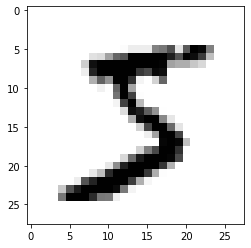

In [22]:
first_digit_image = X[0].reshape(28,28)
plt.imshow(first_digit_image, cmap='binary')

数据准备好以后，我们开始模型训练：

In [23]:
X_train, X_test = X[:6000], X[6000:]
# 注意，mnist的标签是字符，我们先转化为数字。
y_train, y_test = y[:6000].astype(np.uint8), y[6000:].astype(np.uint8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# model = LogisticRegression()
model = SGDClassifier(loss='log')
model.fit(X_train, y_train_5)

SGDClassifier(loss='log')

也可以使用SGDClassifier，默认情况，SGDClassfier的loss='hinge'，对应SVM，如果想要使用LR，则设置loss='log'。

我们使用上述模型预测第一个图片：

In [24]:
model.predict([X[0]])

array([ True])

我们规范一点，使用交叉验证测试准确率。

sklearn提供了很方便的函数cross_val_score()来交叉验证：

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.964 , 0.95  , 0.9625])

注意，使用cross_val_score()只是用于验证模型，最终还需要使用fit()来训练模型。

更灵活的方式是，计算出来预测值，然后根据metric计算。比如以下方式用于计算mse：


In [26]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse_pred = mean_squared_error(y_test, y_pred)
print(mse_pred)

27.444828125


完整代码如下：

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X,y = pd.DataFrame.to_numpy(mnist['data']), pd.DataFrame.to_numpy(mnist['target'])

X_train, X_test = X[:6000], X[6000:]
y_train, y_test = y[:6000].astype(np.uint8), y[6000:].astype(np.uint8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

model = SGDClassifier(loss='hinge')
model.fit(X_train, y_train_5)
print(model.predict([X[0]]))

from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_5, cv=3, scoring='accuracy')

[ True]


array([0.956 , 0.958 , 0.9665])

## 2、iris数据集

我们在看一下使用iris数据集做分类示例。同时还简单的示范了如何使用LogisticRegression解决多分类问题。

In [28]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()

X = iris['data']
y = (iris['target'] == 2).astype(int) #看是否属于类别2

log_reg = LogisticRegression(penalty='l2', C=0.1)
log_reg.fit(X, y)

LogisticRegression(C=0.1)

我们看一下效果：

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X, y, cv=3, scoring='accuracy')

array([0.94, 0.94, 0.88])

上述例子中，我们只把样本预测为是否类别2，下面我们尝试一下把它预测到正确的类别，也就是多分类问题。

当用两个以上的类训练时，ScikitLearn的LogisticRegressio默认选择使用的是一对多的训练方式，不过将超参数multi_class设置为"multinomial"，可以将其切换成Softmax回归。你还必须指定一个支持Softmax回归的求解器，比如"lbfgs"求解器（详见ScikitLearn文档）。默认使用L2正则化，你可以通过超参数C进行控制：

In [30]:
X = iris['data']
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=1000)
softmax_reg.fit(X, y)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial')

In [31]:
cross_val_score(softmax_reg, X, y, cv=3, scoring='accuracy')

array([0.98, 0.98, 0.96])